In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import plotly.graph_objs as go
import plotly .offline as offline
import plotly.figure_factory as ff

In [2]:
# Importing dataset and examining it
dataset = pd.read_csv("E:/data visualization/Patches.csv")
print(dataset.head())
print(dataset.shape)
print(dataset.info())
print(dataset.describe())

   Elevation  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      3                               258   
1       2590      2                               212   
2       2804      9                               268   
3       2785     18                               242   
4       2595      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Horizontal_Distance_To_Fire_Points   Tree  
0                                6279  Other  
1                                6225  Other  
2                                6121  Other  
3                                6211  Other  
4

In [3]:
dataset['Tree'] = dataset['Tree'].map({'Other':1, 'Spruce':0})

In [4]:
dataset.isnull().sum()

Elevation                             0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Horizontal_Distance_To_Fire_Points    0
Tree                                  0
dtype: int64

In [5]:
dataset.shape

(15120, 7)

In [6]:
'''
# Dividing data into subsets
#Personal Data
df.dropna(subset = ["Tree"], inplace=True)
'''

'\n# Dividing data into subsets\n#Personal Data\ndf.dropna(subset = ["Tree"], inplace=True)\n'

In [7]:
df=dataset

In [8]:
df.shape

(15120, 7)

In [9]:
df.dtypes

Elevation                             int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Horizontal_Distance_To_Fire_Points    int64
Tree                                  int64
dtype: object

In [10]:
# Plotting Correlation Heatmap
corrs = df.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
offline.plot(figure,filename='corrheatmap.html')

'corrheatmap.html'

In [11]:

df=df.drop(['Horizontal_Distance_To_Hydrology','Horizontal_Distance_To_Roadways'], axis=1)

In [12]:
df

,Elevation,Slope,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Tree
0,2596,3,0,6279,1
1,2590,2,-6,6225,1
2,2804,9,65,6121,1
3,2785,18,118,6211,1
4,2595,2,-1,6172,1
...,...,...,...,...,...
15115,2607,23,7,1282,1
15116,2603,19,195,1325,1
15117,2492,25,117,1187,1
15118,2487,28,101,932,1


In [13]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(df)

In [14]:
df.isnull().sum()

Elevation                             0
Slope                                 0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Fire_Points    0
Tree                                  0
dtype: int64

In [15]:
df.shape

(15120, 5)

In [16]:
# Dividing dataset into label and feature sets
X = dataset.drop(['Elevation','Slope', 'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Fire_Points'], axis = 1) # Features
Y = dataset['Tree'] # Labels
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(15120, 3)
(15120,)


Variance explained by each of the n_components:  [0.37691219 0.23565581]
Total variance explained by the n_components:  0.6125679980173331


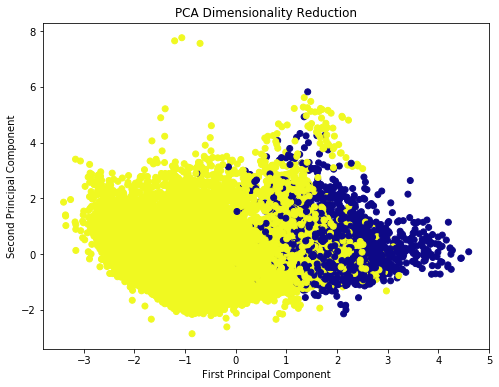

In [17]:
# Implementing PCA to visualize dataset
pca = PCA(n_components = 2)
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)
print("Variance explained by each of the n_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_))
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1],c=Y, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Dimensionality Reduction')
plt.show()

PCA does not work here as our dataset is non- linear

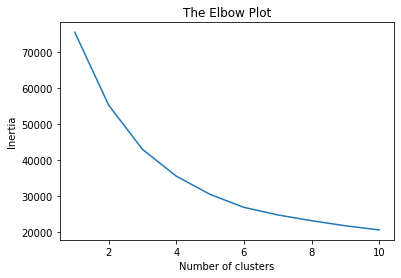

In [18]:
# Analysis on subset1 - Personal Data
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [19]:
# Running KMeans to generate labels
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X1)

NameError: name 'X1' is not defined

In [ ]:
# Implementing t-SNE to visualize dataset
tsne = TSNE(n_components = 2, perplexity = 30 ,n_iter=1650 )
x_tsne = tsne.fit_transform(X1)

Elevation  = list(df['Elevation'])
Slope = list(df['Slope'])
Vertical_Distance_To_Hydrology = list(df['Vertical_Distance_To_Hydrology'])
Horizontal_Distance_To_Fire_Points = list(df['Horizontal_Distance_To_Fire_Points'])
Tree = list(df['Tree'])
data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'Elevation : {a}; Slope: {b}; Vertical_Distance_To_Hydrology:{c}; Horizontal_Distance_To_Fire_Points:{d}, Tree:{e} ' for a,b,c,d,e in list(zip(Elevation,Slope,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Tree))],
                                hoverinfo='text')]

layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE_a1.html')